# WEEK 12 IN-MODULE EXERCISES: EXPLORING THE RELATIONSHIP BETWEEN CHICAGO AND CHAMPAIGN TEMPERATURES VIA A UNIVARIATE LINEAR REGRESSION
### You'll begin working with this data this week, and finish next week! It'll be too much for all this week (in addition to your homework assignment!)

In [109]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

import statsmodels.api as sm
from sklearn.metrics import mean_squared_error # may need to install sklearn - machine learning package
from sklearn.metrics import r2_score

### DATA
- daily Chicago temperatures: 'temps_chicago.csv'
- daily Champaign temperatures: 'temps_champaign.csv'
<br><br>
- each dataset consists of date, maximum daily temperature (TMAX) and minimum daily temperature (TMIN)

### (1) Read in each dataset, handle time correctly, and set index accordingly.

In [110]:
chi_df = pd.read_csv('data/week12/temps_chicago.csv',   index_col='DATE', parse_dates=True)
cha_df = pd.read_csv('data/week12/temps_champaign.csv', index_col='DATE', parse_dates=True)

### (2)  What range of times does each dataset contain?  Are they the same?

In [111]:
chi_r = (chi_df.index.min(), chi_df.index.max())
cha_r = (cha_df.index.min(), cha_df.index.max())
print(f'Chicago: {chi_r}\nChampaign: {cha_r}\n\
These are {"the" if chi_r == cha_r else "not the"} same')

Chicago: (Timestamp('1959-01-01 00:00:00'), Timestamp('2020-12-31 00:00:00'))
Champaign: (Timestamp('1959-01-01 00:00:00'), Timestamp('2020-12-31 00:00:00'))
These are the same


### (3) Are there NaNs? Remove them - VERY CAREFULLY
- as we are ultmately going to run a linear regression on the time series of Chicago temperature and the time series of Champaign temperature data, there's something special you'll have to do when you remove NaNs

In [112]:
print(f'Presence of NaN in Chicago DF: {any(chi_df.isnull())}')
print(f'Presence of NaN in Champaign DF: {any(cha_df.isnull())}')

# TODO: HOW TO PROCESS NAN?
chi_df = chi_df.dropna()
cha_df = cha_df.dropna()

Presence of NaN in Chicago DF: True
Presence of NaN in Champaign DF: True


### (4) Create a new column that consists of *average* daily temperature

In [113]:
chi_df['DAY_AVG'] = (chi_df['TMAX'] + chi_df['TMIN']) / 2
cha_df['DAY_AVG'] = (cha_df['TMAX'] + cha_df['TMIN']) / 2

### (5) Create a panel plot (two subplots, one for each city's time series), of *average* daily temperature.  You must include titles, labels, etc

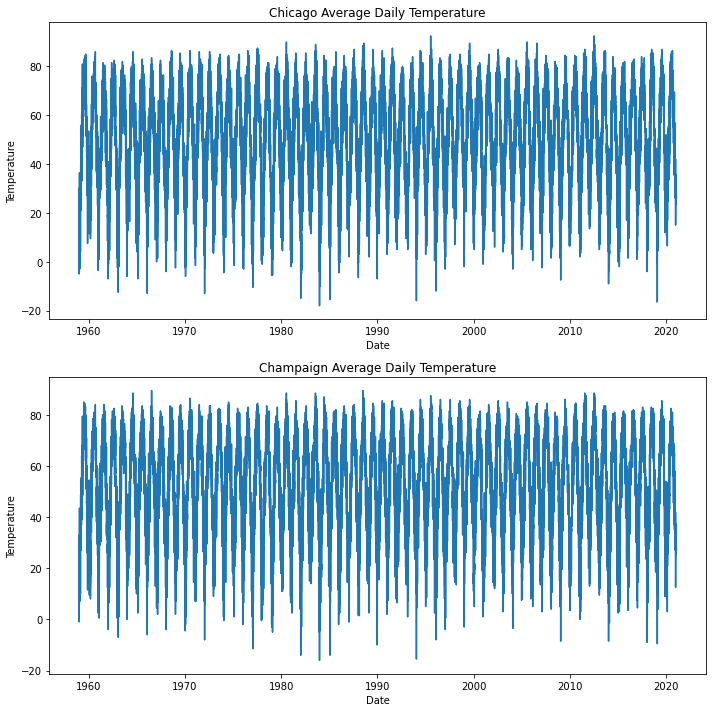

In [114]:
fig, axs = plt.subplots(2,1, figsize=(10,10))
city_data = [('Chicago', chi_df), ('Champaign',cha_df)]
for i, ax in enumerate(axs):
    df = city_data[i][1]
    ax.plot(df.index, df['DAY_AVG'])
    ax.set_title(f'{city_data[i][0]} Average Daily Temperature')
    ax.set_xlabel('Date')
    ax.set_ylabel('Temperature')
plt.tight_layout()

### (6) Create a scatterplot of Chicago vs. Champaign daily average temperatures.  You must include labels, title, etc!

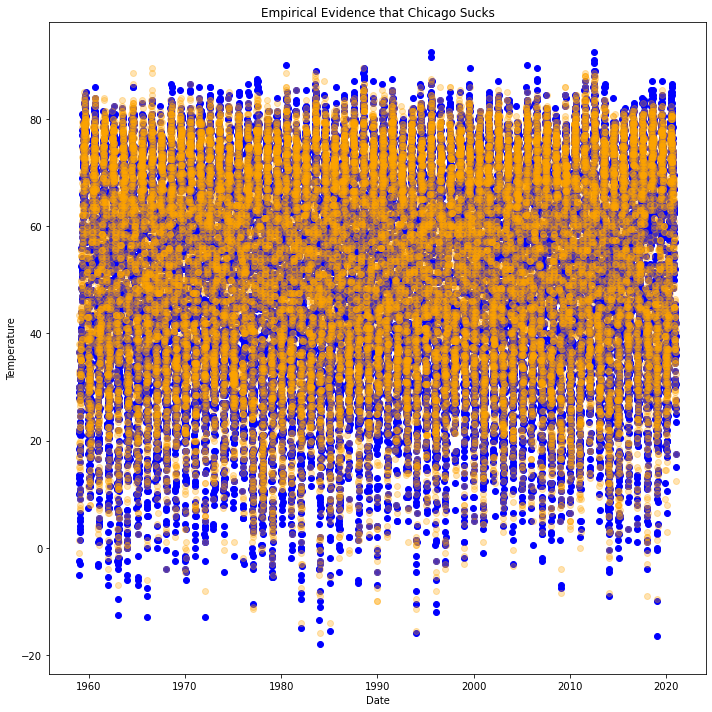

In [115]:
fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.scatter(chi_df.index, chi_df['DAY_AVG'], c='blue', alpha=1)
ax.scatter(cha_df.index, cha_df['DAY_AVG'], c='orange', alpha=0.3)
ax.set_xlabel('Date')
ax.set_ylabel('Temperature')
ax.set_title('Empirical Evidence that Chicago Sucks')
plt.tight_layout()

### (7) From your plots you produced in Q5+ Q6:
### (a.) Do Chicago + Champaign daily average temperatures appear to have a relationship?  Comment on why this does or does not make sense. 
- Yes they appear to be generally related. To be fair, the two are less then two degrees of latitude apart. Unsurprisingly, Champaign appears to be overall warmer than Chicago.

### (b.)  From looking at this data - especially the time series plots in Q5 - what issues do you foresee may arise when working with this data in regression modeling? *We'll address these issues next week, when you'll continue working with these time series!*

- This data is not normally distributed. Furthermore, there is the issue of artifacts (I think thats the right word, but couldn't find the definition quickly) due to difference in geographic location that really show up in the scatter plot by virtue of the thick band of orange in the higher ranges of temperature.

### (8)  Regression modeling time! Create a univariate linear regression model using this daily, average temperature data - specifically, using Chicago temperatures to predict Champaign temperatures!  Create a plot of your raw data with the univariate regression model line as well.

In [116]:
d = chi_df[~chi_df.index.isin(cha_df.index)]

print(len(chi_df.index))
print(len(cha_df.index))
print(len(d.index))

print(chi_df.index)
print()
print(cha_df.index)



22646
22600
46
DatetimeIndex(['1959-01-01', '1959-01-02', '1959-01-03', '1959-01-04',
               '1959-01-05', '1959-01-06', '1959-01-07', '1959-01-08',
               '1959-01-09', '1959-01-10',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='DATE', length=22646, freq=None)

DatetimeIndex(['1959-01-01', '1959-01-02', '1959-01-03', '1959-01-04',
               '1959-01-05', '1959-01-06', '1959-01-07', '1959-01-08',
               '1959-01-09', '1959-01-10',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='DATE', length=22600, freq=None)


Int64Index([    1,     2,     3,     4,     5,     6,     7,     8,     9,
               10,
            ...
            22637, 22638, 22639, 22640, 22641, 22642, 22643, 22644, 22645,
            22646],
           dtype='int64', name='DATE', length=22600)


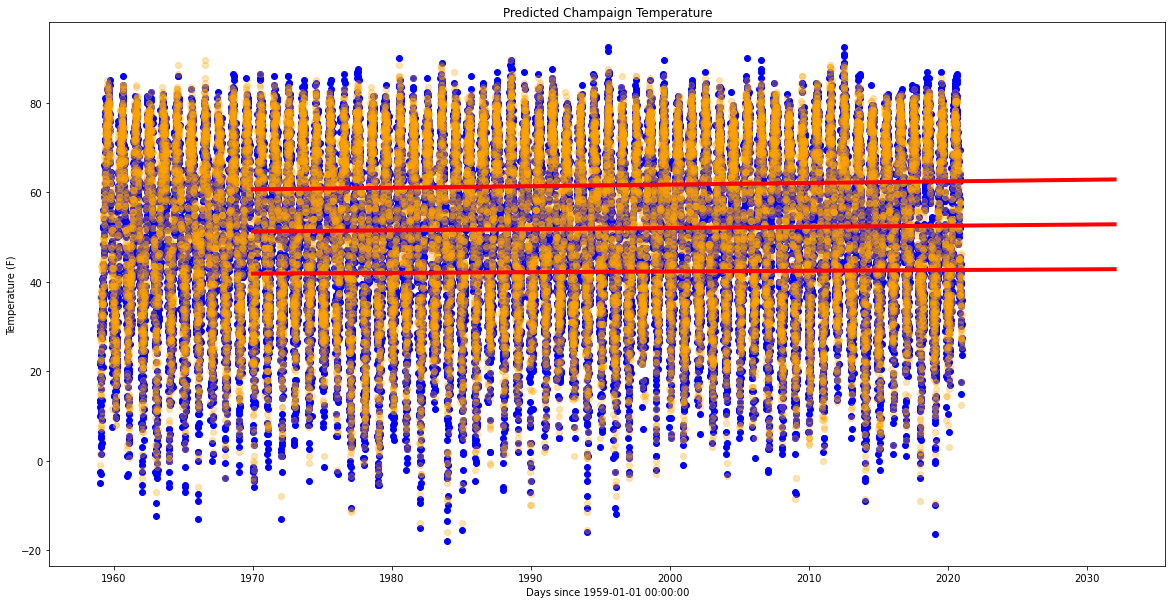

In [136]:
date_start = chi_df.index[0]
t = 1+((cha_df.index - cha_df.index[0]) / np.timedelta64(1, 'D')).astype(int)
print(t)

chi = np.squeeze(chi_df.values)
cha = np.squeeze(cha_df.values)

x2 = sm.add_constant(t)

mod_uni = sm.OLS(cha_df, x2).fit()

y_pred_uni = mod_uni.fittedvalues

fig,ax=plt.subplots(figsize=(20,10))
ax.set_xlabel('Days since '+str(date_start))
ax.set_ylabel('Temperature (F)')
ax.set_title('Predicted Champaign Temperature')

ax.plot(t, y_pred_uni, color='red',linewidth=4)
ax.scatter(chi_df.index, chi_df['DAY_AVG'], color='blue', alpha=1)
ax.scatter(cha_df.index, cha_df['DAY_AVG'], color='orange', alpha=0.3)

### (9) Next week, you'll produce and evaluate metrics of your model like RMSE, various residual plots, etc.  We're stopping with just producing the model itself, as we'll soon find that evaluating the model will show us issues with the model, and we'll have to take thoughtful steps to improve the model. 

In [ ]:
# I'm not quite sure why things aren't lining up above.... 